### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

The y that we get from wavfile is Time-Domain data and we want to transform time-domain wave to frequency-domain wave by fourier transform.

Then we use rfft function to get Frequency-Domain view of original wave.

When we look at the Frequency-Domain graph, the peaks is what we want.

Other frequencies are noises, which we want to remove. We mask the peak part and filter out the the noises by set the noise frequency to be zero.

After we filter out the noises, we inverse back to Time-Domain data by doing inverse fourier transform, which we used irfft function to do inverse fourier transform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

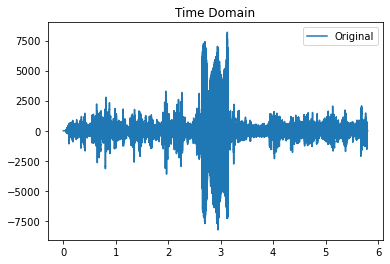

In [2]:
from scipy.io import wavfile
freq, y = wavfile.read('images/record.wav')
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

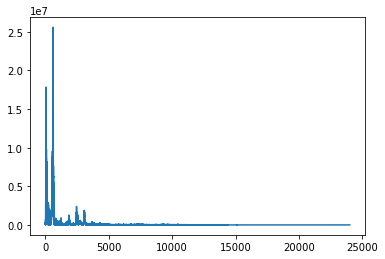

In [3]:
n = len(t)
yf = rfft(y)
xf = rfftfreq(n, dt)

plt.plot(xf, np.abs(yf))

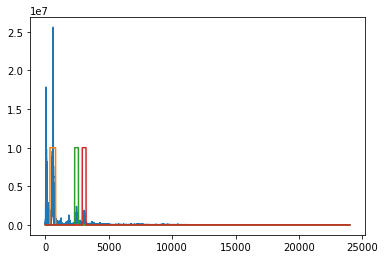

In [4]:
mask1 = np.where(np.logical_and(xf > 350, xf < 800), 1, 0)
mask2 = np.where(np.logical_and(xf > 2300, xf < 2600), 1, 0)
mask3 = np.where(np.logical_and(xf > 2900, xf < 3200), 1, 0)
mask = np.logical_or(np.logical_or(mask1, mask2), mask3)
plt.plot(xf, np.abs(yf))
plt.plot(xf, mask1 * 1e7)
plt.plot(xf, mask2 * 1e7)
plt.plot(xf, mask3 * 1e7)

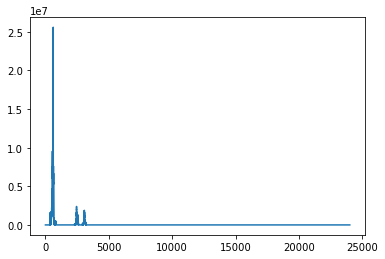

In [5]:
yf_clean = yf * mask
plt.plot(xf, np.abs(yf_clean))

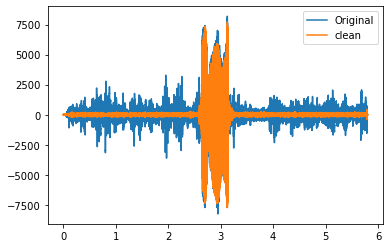

In [6]:
new_f_clean = irfft(yf_clean)
plt.plot(t, y, label='Original')
plt.plot(t, new_f_clean, label='clean')
plt.legend()

In [7]:
wavfile.write('record_noise_reduced.wav', freq, np.array(new_f_clean, dtype=np.int16))